**Web Scrapping**

In [ ]:
!pip install requests-html
!pip install beautifulsoup4

In [2]:
# Using requests_html
import pandas as pd
from requests_html import HTMLSession

In [3]:
session = HTMLSession()
page = session.get('https://en.wikipedia.org/wiki/List_of_national_capitals')

data = pd.read_html(page.content)
data[1]

,City/Town,Country/Territory,Notes
0,Abidjan (former capital; still has many govern...,Ivory Coast,NaN
1,Yamoussoukro (official),Ivory Coast,NaN
2,Abu Dhabi,United Arab Emirates,NaN
3,Abuja,Nigeria,Lagos was the capital from 1914 to 1991.
4,Accra,Ghana,NaN
...,...,...,...
261,Windhoek,Namibia,NaN
262,Yaoundé,Cameroon,NaN
263,Yaren (de facto),Nauru,"Nauru has no official capital; however, the go..."
264,Yerevan,Armenia,NaN


In [4]:
# Using beautiful soup
from bs4 import BeautifulSoup
import requests

page = requests.get('https://www.imdb.com/chart/top/')
soup = BeautifulSoup(page.text, 'html')
table = soup.find_all('table')

df = pd.read_html(str(table))
df[0].columns

Index(['Unnamed: 0', 'Rank & Title', 'IMDb Rating', 'Your Rating',
       'Unnamed: 4'],
      dtype='object')

In [5]:
cleaned_df = df[0].drop(columns=['Unnamed: 0', 'Unnamed: 4', 'Your Rating'])
cleaned_df

,Rank & Title,IMDb Rating
0,1. The Shawshank Redemption (1994),9.2
1,2. The Godfather (1972),9.2
2,3. The Dark Knight (2008),9.0
3,4. The Godfather Part II (1974),9.0
4,5. 12 Angry Men (1957),9.0
...,...,...
245,246. The Iron Giant (1999),8.0
246,247. The Help (2011),8.0
247,248. Aladdin (1992),8.0
248,249. Dersu Uzala (1975),8.0


**Twitter Sentiment Analysis**

In [6]:
from textblob import TextBlob

In [7]:
def sentiment_analysis(text):
  txt_blob = TextBlob(text)
  print(txt_blob.sentiment)

sentiment_analysis("This movie was badly directed")

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


**Text Summarisation using Spacy**

In [8]:
!pip install spacy

In [9]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from collections import Counter
from heapq import nlargest

In [10]:
nlp = spacy.load('en_core_web_sm')
TEXT = """Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to progressively improve their performance on a specific task. Machine learning algorithms build a mathematical model of sample data, known as “training data”, in order to make predictions or decisions without being explicitly programmed to perform the task. Machine learning algorithms are used in the applications of email filtering, detection of network intruders, and computer vision, where it is infeasible to develop an algorithm of specific instructions for performing the task. Machine learning is closely related to computational statistics, which focuses on making predictions using computers. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a field of study within machine learning and focuses on exploratory data analysis through unsupervised learning. In its application across business problems, machine learning is also referred to as predictive analytics."""

In [11]:
doc = nlp(TEXT)


In [12]:
keywords = []
stop_words = list(STOP_WORDS)
post_tag = ['PROPN', 'ADJ', 'NOUN', 'VERB']

for token in doc:
  if(token.text in stop_words or token.text in punctuation):
    continue
  if(token.pos_ in post_tag):
    keywords.append(token.text)


In [13]:
freq_word = Counter(keywords)
freq_word.most_common(5)

[('learning', 8), ('Machine', 4), ('study', 3), ('algorithms', 3), ('task', 3)]

In [14]:
max_freq = Counter(keywords).most_common()[0][1]

for word in freq_word.keys():
  freq_word[word] = freq_word[word] / max_freq

In [15]:
sent_strength = {}
for sent in doc.sents:
  for word in sent:
    if word.text in freq_word.keys():
      if sent in sent_strength.keys():
        sent_strength[sent] += freq_word[word]
      else:
        sent_strength[sent] = freq_word[word]
print(sent_strength)

{Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to progressively improve their performance on a specific task.: 0, Machine learning algorithms build a mathematical model of sample data, known as “training data”, in order to make predictions or decisions without being explicitly programmed to perform the task.: 0, Machine learning algorithms are used in the applications of email filtering, detection of network intruders, and computer vision, where it is infeasible to develop an algorithm of specific instructions for performing the task.: 0, Machine learning is closely related to computational statistics, which focuses on making predictions using computers.: 0, The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning.: 0, Data mining is a field of study within machine learning and focuses on exploratory data analysis through unsupervised learning.: 0, In its appli

In [16]:
summary = nlargest(3, sent_strength, key=sent_strength.get)
summary
ans = ''
for sent in summary:
  ans = ans + str(sent.text) + ' '
ans

'Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to progressively improve their performance on a specific task. Machine learning algorithms build a mathematical model of sample data, known as “training data”, in order to make predictions or decisions without being explicitly programmed to perform the task. Machine learning algorithms are used in the applications of email filtering, detection of network intruders, and computer vision, where it is infeasible to develop an algorithm of specific instructions for performing the task. '

In [17]:
# Text summarisation using gensim

!pip install gensim==3.8.3 # Required for summarize. Restart runtime after install

from gensim.summarization import summarize
summarize(TEXT)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to progressively improve their performance on a specific task.'

**Network measures**

In [18]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import networkx as nx
import matplotlib.pyplot as plt

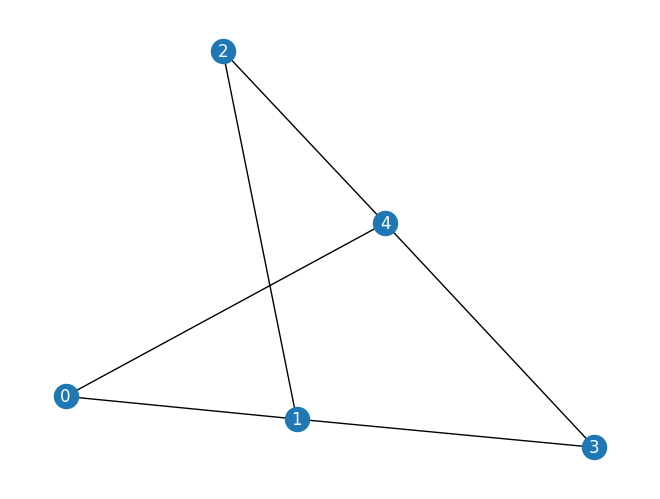

In [20]:
graph = nx.Graph()

N = 5 # Number of nodes in the graph

graph.add_nodes_from(list(range(N)))

EDGES = [
    [0, 1],
    [1, 2],
    [1, 3],
    [2, 4],
    [3, 4],
    [0, 4]
]

# use graph.add_edge((u, v)) to add single edge
# use graph.add_edges_from([(u,v)..]) to add list of edges

graph.add_edges_from(EDGES)

# use:
  # nx.draw(graph)
  # plt.show()
# To draw graph
nx.draw(graph, with_labels = True, font_color='white')
plt.show()

In [21]:
# Centrality measures

betweeness = nx.betweenness_centrality(graph)
closeness = nx.closeness_centrality(graph)
eigenvector = nx.eigenvector_centrality(graph)
katz = nx.katz_centrality(graph)
degree = nx.degree_centrality(graph)

print("Betweenness:", betweeness)
print("Closeness:", closeness)
print("Eigenvector:", eigenvector)
print("Katz:", katz)
print("Degree:", degree)

Betweenness: {0: 0.05555555555555555, 1: 0.25, 2: 0.05555555555555555, 3: 0.05555555555555555, 4: 0.25}
Closeness: {0: 0.6666666666666666, 1: 0.8, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 0.8}
Eigenvector: {0: 0.4082485111514333, 1: 0.4999997297138842, 2: 0.4082485111514333, 3: 0.4082485111514333, 4: 0.4999997297138842}
Katz: {0: 0.43244999098836634, 1: 0.4684874682862316, 2: 0.43244999098836634, 3: 0.43244999098836634, 4: 0.4684874682862316}
Degree: {0: 0.5, 1: 0.75, 2: 0.5, 3: 0.5, 4: 0.75}


**Sentiment analysis**

In [22]:
DATASET = [
    ['Good book', 1],
    ['Good movie', 1],
    ['Good show', 1],
    ['Good car', 1],
    ['Good bus', 1],
    ['Good food', 1],
    ['Bad book', 0],
    ['Bad movie', 0],
    ['Bad show', 0],
    ['Bad bus', 0],
    ['Bad food', 0],
    ['Bad car', 0],
]

sentences = []
sentiments = []
for pair in DATASET:
  sentences.append(pair[0])
  sentiments.append(pair[1])

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 1))
vectors = vectorizer.fit_transform(sentences)
vectors.toarray()

array([[0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0]])

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

x = vectors.toarray()
y = sentiments
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state = 0)

In [25]:
nb = MultinomialNB()
y_pred = nb.fit(X_train, Y_train).predict(X_test)

In [26]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_pred, Y_test)
accuracy

1.0

**TF-IDF**

In [27]:
TEXT1 = '''Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation. Python is dynamically typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly procedural), object-oriented and functional programming. It is often described as a "batteries included" language due to its comprehensive standard library. Today, Python is very high in demand and all the major companies are looking for great Python Programmers to develop websites, software components, and applications or to work with Data Science, AI, and ML technologies. When we are developing this tutorial in 2022, there is a high shortage of Python Programmers where as market demands more number of Python Programmers due to it's application in Machine Learning, Artificial Intelligence etc.'''
TEXT2 = '''Python is a general-purpose, versatile, and powerful programming language. It’s a great first language because Python code is concise and easy to read. Whatever you want to do, python can do it. From web development to machine learning to data science, Python is the language for you.'''
TEXT3 = '''Python was first released in 1991. Over 30 years later, Python remains one of the most popular programming languages among hobbyist and professional developers worldwide. TIOBE declared Python the programming language of the year in 2021. This was the third time Python won these honors in the last five years alone. The Python programming language is highly developed, both culturally and technically. Python developers often call themselves Pythonistas. The Python language even has its own philosophy: the Zen of Python. With versatile use cases across various industries, Python developers are in high demand. So, should you join the ranks of Python developers and become a Pythonista yourself?'''

TEXT1 = TEXT1.lower()
TEXT2 = TEXT2.lower()
TEXT3 = TEXT3.lower()


In [28]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')

# nltk.download('stopwords') May or may not be required

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
import math

# Removing stop words
def remove_stopwords(text):
  text = text.split(" ")
  cleaned = []
  for word in text:
    if word not in sw:
      cleaned.append(word)
  return cleaned


# Get frequency dict of list of words
def get_freq(words):
  freq = {}
  for word in words:
    if word not in freq:
      freq[word] = 1
    else:
      freq[word] += 1

  return freq


# Get term-frequency
def get_tf(words, total_words):
  tf = {}
  for word in words.keys():
    tf[word] = words[word] / total_words
  
  return tf

# Get idf
def get_idf(words, documents):
  idf = {}
  for word in words:
    count = 0
    for document in documents:
      if word in document:
        count += 1
    
    idf[word] = math.log(len(documents) / count)
  
  return idf

# Get tf-idf
def get_tfidf(tf, idf):
  tfidf = {}
  for key in tf.keys():
    tfidf[key] = tf[key] * idf[key]

  return tfidf

In [30]:
list1 = remove_stopwords(TEXT1)
list2 = remove_stopwords(TEXT2)
list3 = remove_stopwords(TEXT3)

document = [list1, list2 ,list3]

freq_1 = get_freq(list1)
freq_2 = get_freq(list2)
freq_3 = get_freq(list3)

len_1 = len(list1)
len_2 = len(list2)
len_3 = len(list3)

tf_1 = get_tf(freq_1, len_1)
tf_2 = get_tf(freq_2, len_2)
tf_3 = get_tf(freq_3, len_3)

idf_1 = get_idf(set(freq_1), document)
idf_2 = get_idf(set(freq_2), document)
idf_3 = get_idf(set(freq_3), document)

tfidf_1 = get_tfidf(tf_1, idf_1)
tfidf_2 = get_tfidf(tf_2, idf_2)
tfidf_3 = get_tfidf(tf_3, idf_3)

print(tfidf_1)
print(tfidf_2)
print(tfidf_3)

{'python': 0.0, 'high-level,': 0.014267692060624804, 'general-purpose': 0.014267692060624804, 'programming': 0.0, 'language.': 0.005265780624781356, 'design': 0.014267692060624804, 'philosophy': 0.014267692060624804, 'emphasizes': 0.014267692060624804, 'code': 0.005265780624781356, 'readability': 0.014267692060624804, 'use': 0.005265780624781356, 'significant': 0.014267692060624804, 'indentation.': 0.014267692060624804, 'dynamically': 0.014267692060624804, 'typed': 0.014267692060624804, 'garbage-collected.': 0.014267692060624804, 'supports': 0.014267692060624804, 'multiple': 0.014267692060624804, 'paradigms,': 0.014267692060624804, 'including': 0.014267692060624804, 'structured': 0.014267692060624804, '(particularly': 0.014267692060624804, 'procedural),': 0.014267692060624804, 'object-oriented': 0.014267692060624804, 'functional': 0.014267692060624804, 'programming.': 0.014267692060624804, 'often': 0.005265780624781356, 'described': 0.014267692060624804, '"batteries': 0.014267692060624